python time series analysis course https://www.udemy.com/course/python-for-time-series-analysis-and-forecasting-arima/learn/lecture/12717197?start=0#overview

In [1]:
import pandas as pd

In [2]:
!ls -ltr

total 61688
-rw-r--r--@ 1 joydeepbhattacharjee  staff  17333449 Dec 15 20:54 train.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    975309 Dec 15 20:54 test.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff    393899 Dec 15 20:54 sample_submission.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff   3454726 Dec 25 08:48 demand-forecasting-kernels-only.zip
-rw-r--r--  1 joydeepbhattacharjee  staff   4077500 Dec 25 11:38 time series analysis.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff     16226 Dec 28 22:23 time series metrics.ipynb
-rw-r--r--  1 joydeepbhattacharjee  staff       519 Jan  4 08:48 shampoo.csv
-rw-r--r--  1 joydeepbhattacharjee  staff    492527 Jan  5 08:53 time series analysis shampoo dataset.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      1200 Jan 13 20:27 LYNXdata.csv
-rw-r--r--@ 1 joydeepbhattacharjee  staff     27912 Jan 13 20:34 Time Series Analysis and Forecasting in Python - Course Script.ipynb
-rw-r--r--@ 1 joydeepbhattacharjee  staff      2087 Jan 15 11:24 us-inf

In [3]:
euindices = pd.read_csv("EuIndices.csv")

In [4]:
euindices.head()

,Unnamed: 0,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


In [5]:
euindices_df = pd.DataFrame(data=euindices.values,
                            columns=['0', 'DAX', 'SMI', 'CAC', 'FTSE'], 
                            index=pd.DatetimeIndex(start='1991-01-01', periods=1860, freq='B'))

/Users/joydeepbhattacharjee/miniconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
euindices_df = euindices_df.drop(columns=['0'])

In [7]:
euindices_df.head()

,DAX,SMI,CAC,FTSE
1991-01-01,1628.75,1678.1,1772.8,2443.6
1991-01-02,1613.63,1688.5,1750.5,2460.2
1991-01-03,1606.51,1678.6,1718.0,2448.2
1991-01-04,1621.04,1684.1,1708.1,2470.4
1991-01-07,1618.16,1686.6,1723.1,2484.7


In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationary(timeseries):
#     rol_mean = timeseries.rolling(window=window).mean()
#     rol_std = timeseries.rolling(window=window).std()
    
#     # plot rolling statistics
#     orig = plt.plot(timeseries, color='blue', label='original')
#     mean = plt.plot(rol_mean, color='red', label='ROlling mean')
#     std = plt.plot(rol_std, color='black', label='Rolling std')
#     plt.legend(loc='best')
#     plt.title("rolling mean and standard deviation")
#     plt.show(block=False)
    
    print("Results of dickey fuller test")
    timeseries = timeseries.dropna()
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=["test statistic", 'p-value', "#lags used", 'number of observations used'])
    for k, v in dftest[4].items():
        dfoutput['Critical value {}'.format(k)] = v

    print(dfoutput)
    

In [9]:
from functools import partial

In [10]:
euindices_df.apply(partial(test_stationary))

Results of dickey fuller test
test statistic                    2.295811
p-value                           0.998953
#lags used                       24.000000
number of observations used    1835.000000
Critical value 1%                -3.433919
Critical value 5%                -2.863116
Critical value 10%               -2.567609
dtype: float64
Results of dickey fuller test
test statistic                    2.235032
p-value                           0.998910
#lags used                       22.000000
number of observations used    1837.000000
Critical value 1%                -3.433915
Critical value 5%                -2.863115
Critical value 10%               -2.567608
dtype: float64
Results of dickey fuller test
test statistic                    1.286413
p-value                           0.996532
#lags used                       17.000000
number of observations used    1842.000000
Critical value 1%                -3.433905
Critical value 5%                -2.863110
Critical value 10%  

DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

All values are non stationary as all the values are above 0.05

In [11]:
# differencing to get the data stationary
euindices_diff = euindices_df.diff().dropna()
euindices_diff.head()

,DAX,SMI,CAC,FTSE
1991-01-02,-15.12,10.4,-22.3,16.6
1991-01-03,-7.12,-9.9,-32.5,-12.0
1991-01-04,14.53,5.5,-9.9,22.2
1991-01-07,-2.88,2.5,15.0,14.3
1991-01-08,-7.55,-15.0,-8.8,-17.9


In [12]:
euindices_diff.apply(partial(test_stationary))

Results of dickey fuller test
test statistic                -8.293747e+00
p-value                        4.193799e-13
#lags used                     1.900000e+01
number of observations used    1.839000e+03
Critical value 1%             -3.433911e+00
Critical value 5%             -2.863113e+00
Critical value 10%            -2.567607e+00
dtype: float64
Results of dickey fuller test
test statistic                -8.543303e+00
p-value                        9.652044e-14
#lags used                     1.900000e+01
number of observations used    1.839000e+03
Critical value 1%             -3.433911e+00
Critical value 5%             -2.863113e+00
Critical value 10%            -2.567607e+00
dtype: float64
Results of dickey fuller test
test statistic                -1.015705e+01
p-value                        7.680823e-18
#lags used                     1.600000e+01
number of observations used    1.842000e+03
Critical value 1%             -3.433905e+00
Critical value 5%             -2.863110e+00


DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

In [16]:
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(euindices_diff)

In [17]:
modsel = model.select_order(15)
modsel.summary()

,AIC,BIC,FPE,HQIC
0,25.31,25.32*,9.833e+10,25.32
1,25.28,25.34,9.505e+10,25.30*
2,25.28,25.39,9.553e+10,25.32
3,25.27,25.43,9.458e+10,25.33
4,25.26,25.47,9.382e+10,25.34
5,25.26,25.51,9.357e+10,25.35
6,25.26,25.56,9.332e+10,25.37
7,25.26,25.61,9.361e+10,25.39
8,25.26,25.66,9.371e+10,25.41
9,25.26,25.70,9.314e+10,25.42


The best order is shown in the model

In [18]:
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 25, Jan, 2020
Time:                     19:57:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.7862
Nobs:                     1848.00    HQIC:                   25.4466
Log likelihood:          -33638.3    FPE:                9.23092e+10
AIC:                      25.2484    Det(Omega_mle):     8.38399e+10
--------------------------------------------------------------------
Results for equation DAX
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.689997         0.772454            2.188           0.029
L1.DAX          -0.002794         0.042406           -0.066           0.947
L1.SMI          -0.106047         0.029764           -3.563           0.000
L1.CAC

### the granger causality test

In [19]:
granger_res = results.test_causality(['SMI', 'CAC', 'FTSE'], ['DAX'], kind='f')
granger_res.summary()

Test statistic,Critical value,p-value,df
1.681,1.438,0.009,"(33, 7212)"


## forecasting

<Figure size 864x720 with 0 Axes>

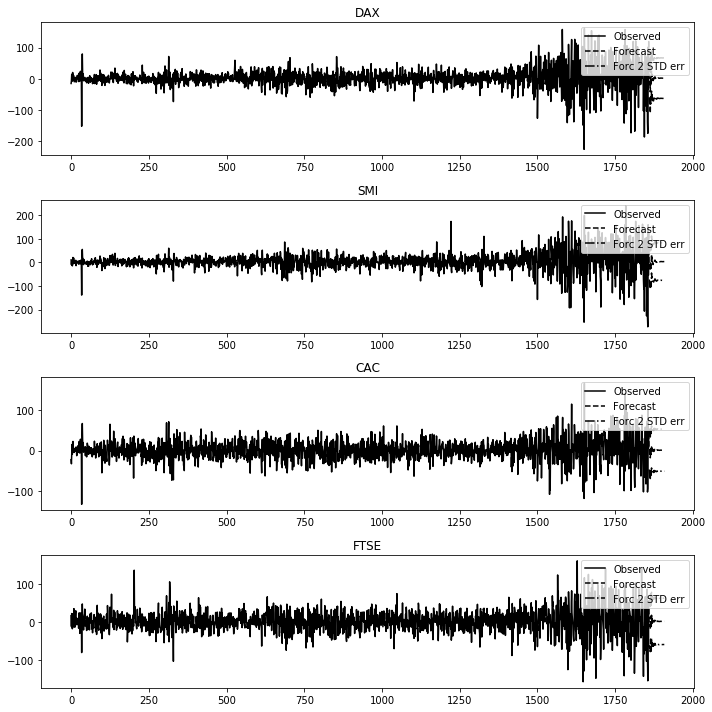

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
results.plot_forecast(50)
plt.tight_layout(h_pad=1.15)
plt.show()

In [22]:
fcast = results.forecast(euindices_diff.values, 50)

In [23]:
pd.DataFrame(fcast).head(10)

,0,1,2,3
0,2.741324,0.096875,4.277166,-1.866084
1,-10.667937,1.598237,-3.815663,-8.844529
2,-16.799369,-16.271632,-12.841545,-7.252005
3,-5.835582,-29.049581,-2.570316,-7.261091
4,-42.079109,-27.371264,-17.589227,-18.620932
5,5.382486,-2.529855,5.556139,14.653687
6,-18.456412,-26.073089,-9.344941,-2.803496
7,-5.182611,-6.843618,0.111457,-16.542253
8,24.483501,33.339289,9.212176,17.710238
9,6.596430,12.813030,5.150053,-3.233233


In [24]:
DAX_values = pd.DataFrame(fcast)[0]
DAX_values.head()

0     2.741324
1   -10.667937
2   -16.799369
3    -5.835582
4   -42.079109
Name: 0, dtype: float64

In [25]:
euindices_df.tail(1)

,DAX,SMI,CAC,FTSE
1998-02-16,5473.72,7676.3,3995.0,5455.0


In [26]:
import numpy as np

In [27]:
de_diff = np.cumsum(DAX_values) + 5473.72

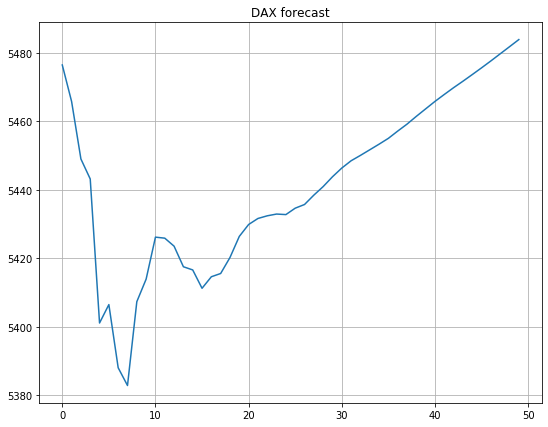

In [28]:
plt.figure(figsize=(9, 7))
plt.plot(de_diff)
plt.title('DAX forecast')
plt.grid()
plt.show()